In [1]:
from graph_class import *
from nltk_class import *
from text_mining import *
import os
import seaborn as sns
import numpy as np

In [2]:
with open('twitter.json', 'r') as file:
    tweet = pd.DataFrame(json.load(file))

In [3]:
nlp = NltkTextProcessing()
tweet_df = nlp.process_df_text_column(tweet, save=False)
tweet_df = nlp.process_df_hash_column(tweet_df)
unique_df = nlp.keep_unique(tweet_df)
unique_df.head(1)

,created_at,id,tweet_text,is_reply,reply_count,retweet_count,hashtags,external_url,author_followers,author_follow,author_loc,media_text
0,2021-08-21 10:22:57,1429026229592764417,"[oltre, milioni, ebrei, militari, rom, omosess...",False,0,0,None,https://twitter.com/i/web/status/1429026229592...,527,951,Roma,None


In [4]:
' '.join(unique_df.iloc[0,2])

'oltre milioni ebrei militari rom omosessuali dissidenti politici rivoltando tomba greenpass qrcode lasciapassare marchioverde vaccino dittaturasanitaria'

In [5]:
len(tweet_df), len(unique_df)

(34554, 7350)

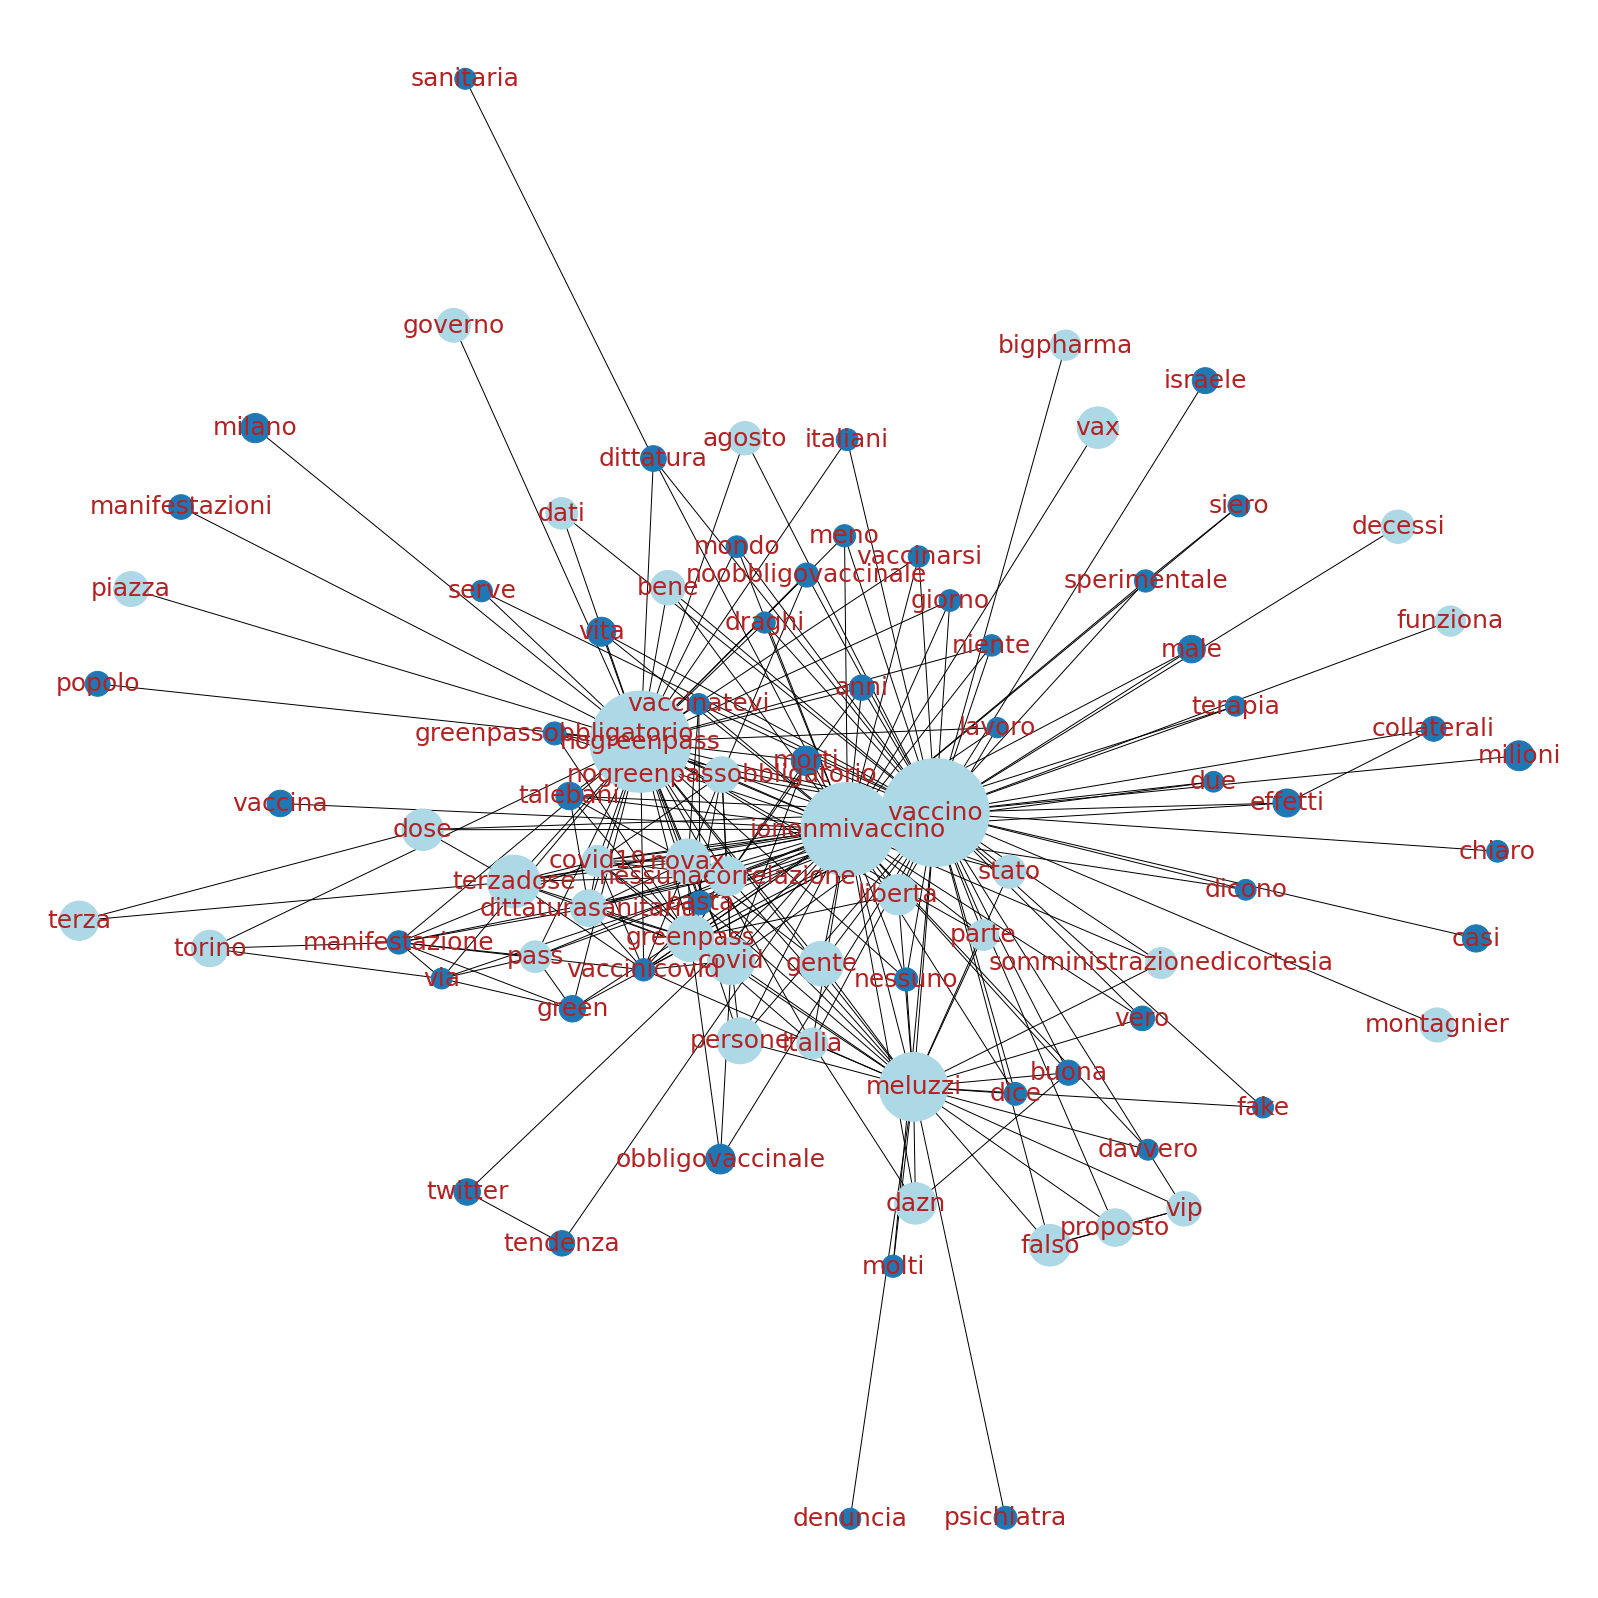

In [6]:
freq_distrib_tweet = nlp.frequency_dist(tweet_df, obj ='tweet')
graph_tweet = filter_pairwise_words(graph_filtered_dist(df=unique_df, distrib=freq_distrib_tweet, thresold=400), thresold=40)
NetworkPlot(graph=graph_tweet, frequency_dist=freq_distrib_tweet, label_thresold=400, color_thresold=900).plot()

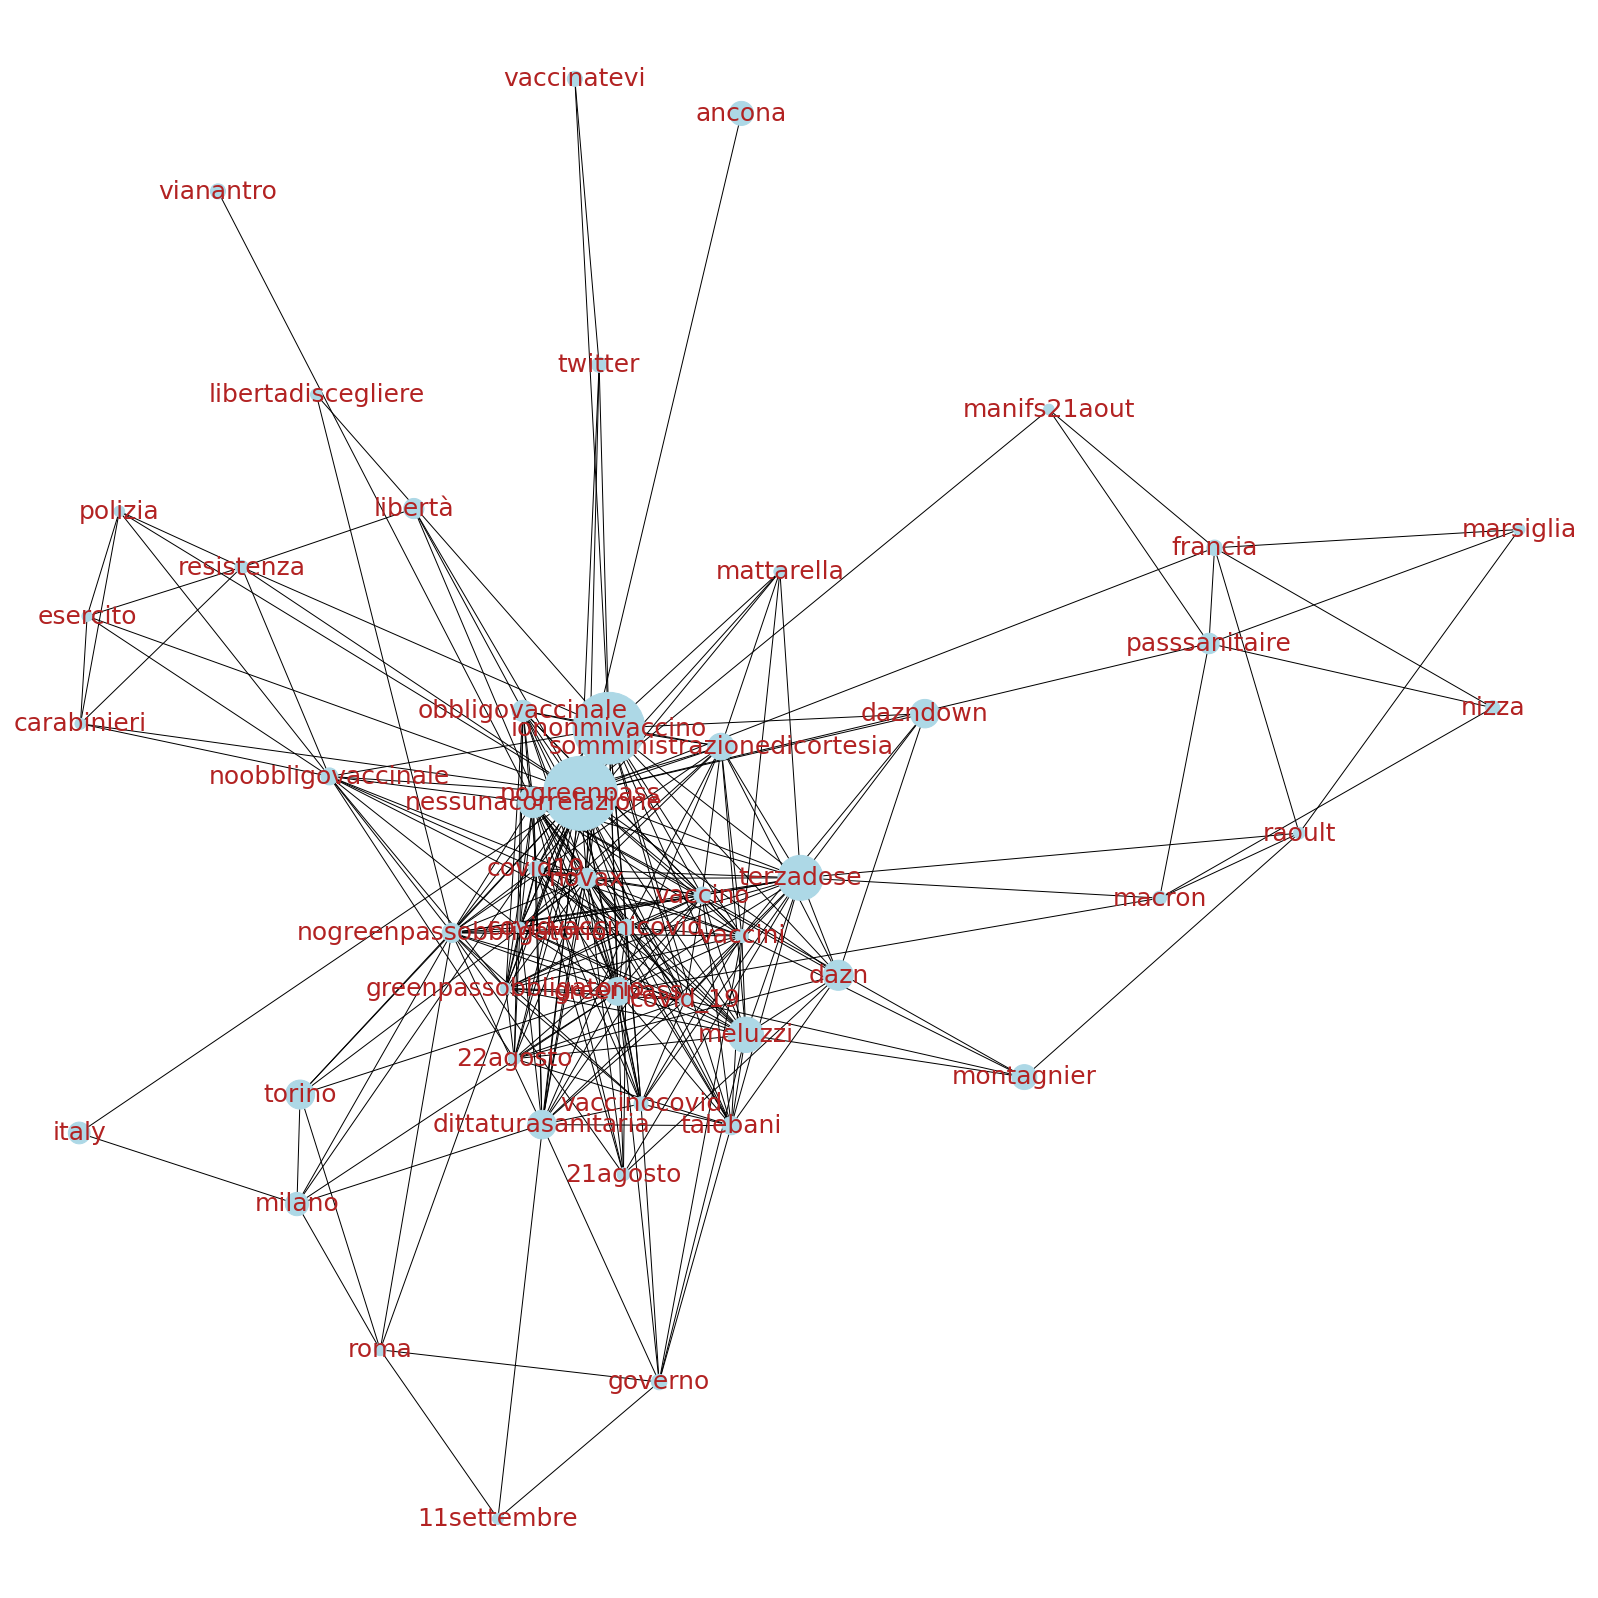

In [7]:
freq_distrib_hash = nlp.frequency_dist(tweet_df, obj ='hash')
graph_hash = graph_filtered_dist(df=unique_df, distrib=freq_distrib_hash, thresold=100, obj='hash')
NetworkPlot(graph= graph_hash, frequency_dist=freq_distrib_hash, label_thresold=50, color_thresold=100).plot()

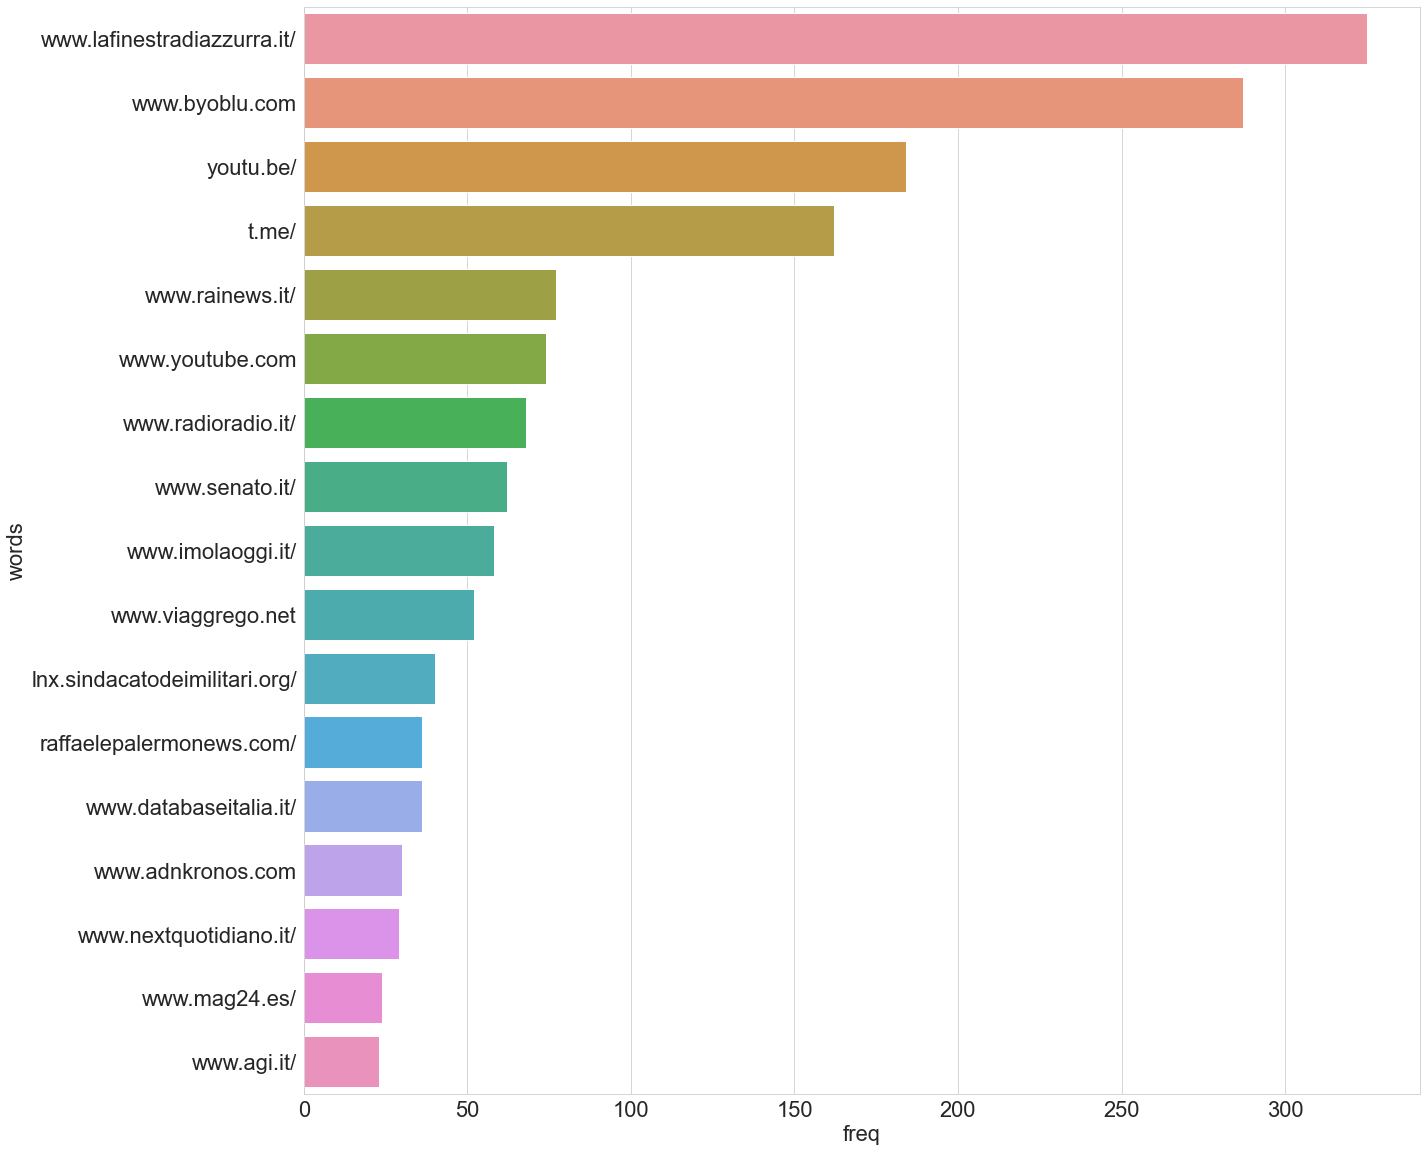

In [8]:
update_parameter()
count_barplot(nlp.extract_external_url(tweet_df), 20)

In [9]:
mining = TextMining()

text_to_vectorize = unique_df['tweet_text'].apply(lambda x: ' '.join(x)).values.tolist()
vectorized_text = mining.vectorized_text(text_to_vectorize)

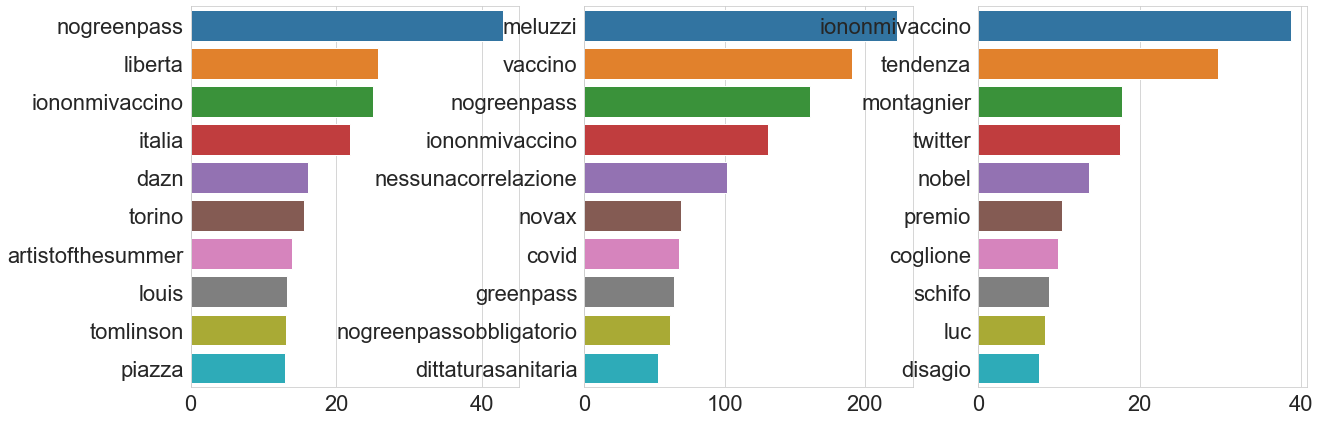

In [10]:
lda_model, feature_names = mining.lda_topic_modeling(vectorized_text, 3)
mining.plot_lda_topic(lda_model, 10)

In [39]:
svd_result = mining.latent_semantic_analysis(vectorized_text, 300)
kmeans = mining.clustering_over_lsa(svd_result, 3)

Explained variance of the SVD step: 0.2674723296852406%


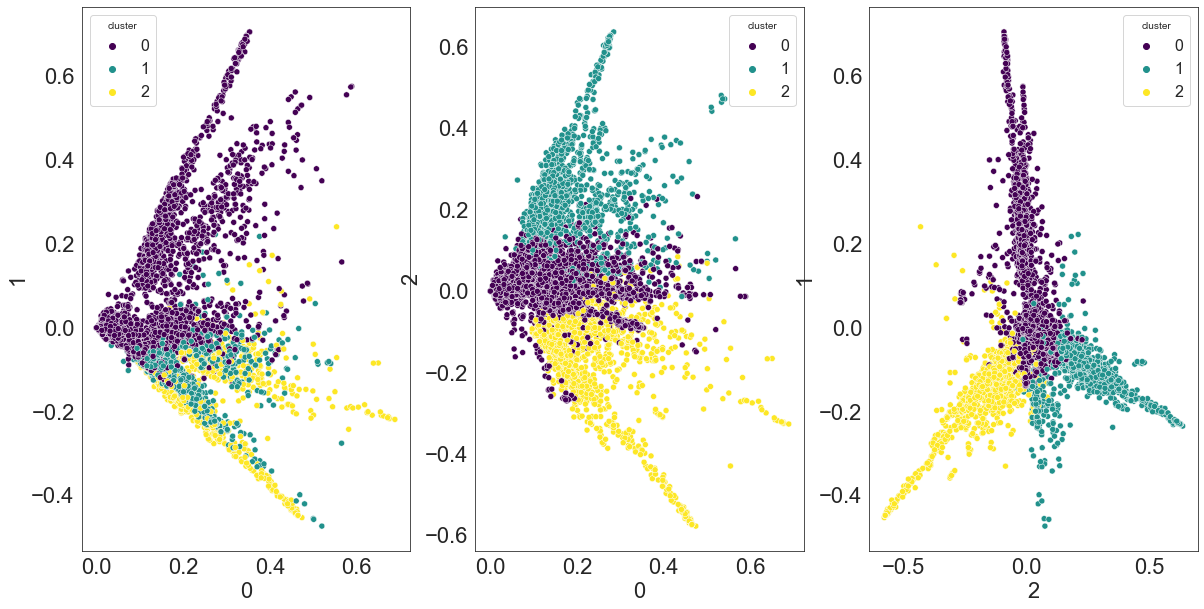

In [57]:
svd_df = pd.DataFrame(svd_result)
svd_df['cluster'] = kmeans.labels_ 

sns.set_style('white')
fig, axes = plt.subplots(1,3, figsize=(20,10))


sns.scatterplot(ax = axes[0], data=svd_df, x=0, y=1, hue='cluster', palette='viridis')
sns.scatterplot(ax = axes[1], data=svd_df, x=0, y=2, hue='cluster', palette='viridis')
sns.scatterplot(ax = axes[2], data=svd_df, x=2, y=1, hue='cluster', palette='viridis')

plt.show()

In [16]:
reducer, umaper_viz_reducer = mining.umaps(svd_result, k=10)

In [17]:
kmeans_umap = mining.clustering_over_lsa(umaper_viz_reducer, 3)

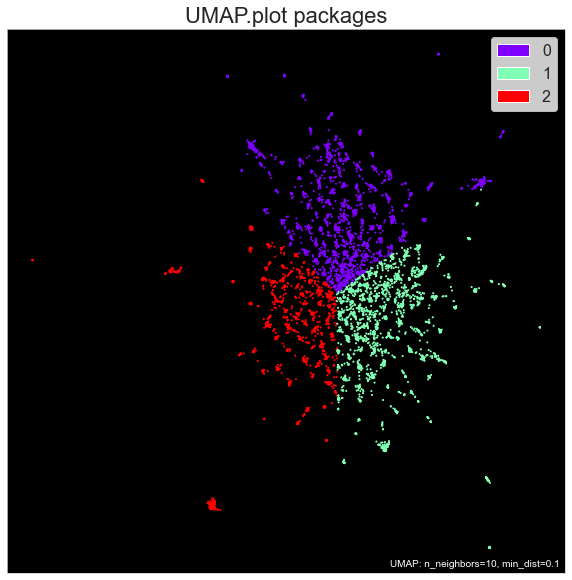

In [18]:
import umap.plot

fig, axes= plt.subplots(1,1, figsize=(10,10))

umap.plot.points(reducer, 
                 labels=kmeans_umap.labels_, 
                 theme='fire', 
                 ax=axes, 
                 show_legend=True)

axes.set_title('UMAP.plot packages')

plt.show()

<AxesSubplot:>

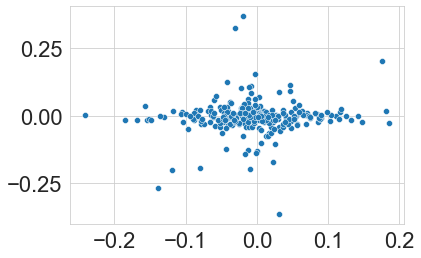

In [14]:
sns.scatterplot(x=svd_result[1], y = svd_result[50])